Data Science
===

Assignment 01 - Best Player of FIFA
---

Mubashir Rasool Razvi <sp19-bse-006@cuilahore.edu.pk>

SP19-BSE-006

---

Steps
---

In order to **complete this assignment** we need to follows following steps such as:

1. Import [*FIFA 19*](https://www.kaggle.com/karangadiya/fifa19) dataset
2. **Clean the data** by removing null values
3. Get all best players where **overall > 88** and **potential > 90**
4. **Plot the graph** on no. players and team positions along their counts
5. **Find best player** for LW position
6. **Best team** for the formation of (4-3-3)

Step 01:
---

To import the data we will need two things one **pandas** library and **dataset** in csv format through kaggle.

1. To install pandas simply need to run: `pip install pandas` or `conda install pandas`
2. Download dataset here: https://www.kaggle.com/karangadiya/fifa19/download

In [161]:
import pandas as pd

In [162]:
df = pd.read_csv('data.csv');

In [163]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Step 02:
---

For cleaning the data we need to perform some actions such as:

1. **Drop the columns** to what we need (instead of 89 columns)
2. **Check unique identifier**, no duplicate exist
3. **Check null values** and fill with the **average of all other players** (or use AI which is out of the scope for now)

In [164]:
df = df[[
    'ID',
    'Name',
    'Overall',
    'Potential',
    'Position',
    'LW',
    'Club'
]]

print(df.shape)
df = df.dropna(axis='rows')
print(df.shape)

(18207, 7)
(15926, 7)


In [165]:
df['ID'].is_unique

True

Step 03:
---

Here is list of all the players name who have more then **>88 overall score** and **potential of 90+**

In [166]:
df.query('Overall > 88 & Potential > 90').sort_values('Overall', ascending=False).Name

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
15            P. Dybala
16              H. Kane
Name: Name, dtype: object

Step 04:
---

Here is data visulization for **count categorical plot**, with the helping of this chart we can easily see **which position is more popular** and in bonus task we can see on which position who is the best player.

In [167]:
import seaborn as sns

In [168]:
%matplotlib inline

In [169]:
sns.set_theme(style="ticks")

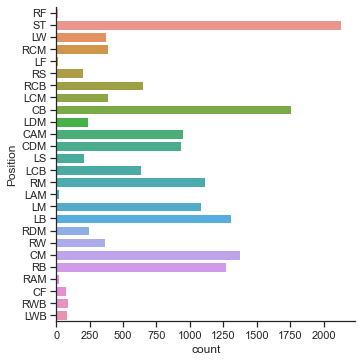

In [170]:
sns.catplot(y="Position", kind='count', data=df)

Step 05:
---

Here we find out who is the best player of **LW** position.

In [171]:
lw_players = df.loc[df['Position'] == 'LW'].sort_values('Overall', ascending=False)

In [172]:
lw_players.reset_index()

,index,ID,Name,Overall,Potential,Position,LW,Club
0,2,190871,Neymar Jr,92,93,LW,89+3,Paris Saint-Germain
1,30,197781,Isco,88,91,LW,84+3,Real Madrid
2,32,189242,Coutinho,88,89,LW,86+3,FC Barcelona
3,29,198219,L. Insigne,88,88,LW,86+3,Napoli
4,55,222492,L. Sané,86,92,LW,84+2,Manchester City
...,...,...,...,...,...,...,...,...
369,17534,241413,L. Hedlund,53,68,LW,53+2,BK Häcken
370,17740,240650,R. Najjarine,52,71,LW,51+2,Melbourne City FC
371,17899,244494,F. Delaveris,51,66,LW,50+2,Odds BK
372,17938,245861,L. Cavallini,51,69,LW,50+2,Foggia


**Best Player:**

In [173]:
lw_players.iloc[0]

ID                        190871
Name                   Neymar Jr
Overall                       92
Potential                     93
Position                      LW
LW                          89+3
Club         Paris Saint-Germain
Name: 2, dtype: object

**Worst Player:**

In [174]:
lw_players.iloc[-1]

ID                   243790
Name           Zhen'ao Wang
Overall                  50
Potential                62
Position                 LW
LW                     49+2
Club         Vejle Boldklub
Name: 18038, dtype: object

Bonus Tasks:
---

Here is extra stuff for my own practice to get usefull informations such as:

1. Get best player for all positions instead of just LW

**Task 01:**

In [175]:
best_players = df.loc[df.groupby('Position')['Overall'].idxmax()]

In [176]:
best_players[['Position', 'Name', 'Overall']].reset_index()

,index,Position,Name,Overall
0,17,CAM,A. Griezmann,89
1,12,CB,D. Godín,90
2,20,CDM,Sergio Busquets,89
3,271,CF,Luis Alberto,82
4,67,CM,Thiago,86
5,28,LAM,J. Rodríguez,88
6,35,LB,Marcelo,88
7,24,LCB,G. Chiellini,89
8,11,LCM,T. Kroos,90
9,14,LDM,N. Kanté,89
